# EDA on survey data

In this unit:
* Melting data
* One-hot encoding (get_dummies) - again
* How to work with survey data
* How employing groupby leads to better plots
* Prompting chatGPT


## Reminder - project steps:
>
> * Load your data to GitHub, then read it
> * Look at it using: `len`, `shape`, `info`, `describe`
> * Describe the variables:  
>   * Categorical variables: `countplot`
>   * Numerical variables:  `histplot`, `boxplot`
>   * Statistics: `barplot`
>   * Relationships: `lineplot`,  `stripplot`
>   * Tables for averages, max, min etc.
>   * Do you need to remove outliers? Change labels? Fill missing values?
> * Look for correlations: `corr`, `heatmap`  
> * Visualize the correlations:  `scatterplot`, `barplot`, `stripplot`, `boxplot` and more
>
>  **Note 1:** These are just examples! There are more ways to visualize  
>  **Note 2:** Sometimes you need to group/filter/melt the data first  
>  **Note 3:** Sometimes presenting is in a table gives the best effect  


  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Some data comes from surveys. This is an example of a survey on fitness

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/fitness.csv'
fit_df = pd.read_csv(url)
fit_df.head(2)

,index,Date,Gender,Age,ImportanceExercise,FitnessLevel,Frequency,Barriers,Activity,DoYouDo,Daytime,Unit,Diet,BarriersDiet,SelfRatingDiet,RecommendedFriend,PurchasedEquipment,Motivation
0,0,2019/07/03 11:48:07 PM GMT+5:30,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,1,2019/07/03 11:51:22 PM GMT+5:30,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...


In [3]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               545 non-null    int64 
 1   Date                545 non-null    object
 2   Gender              545 non-null    object
 3   Age                 545 non-null    object
 4   ImportanceExercise  545 non-null    int64 
 5   FitnessLevel        545 non-null    object
 6   Frequency           545 non-null    object
 7   Barriers            545 non-null    object
 8   Activity            545 non-null    object
 9   DoYouDo             545 non-null    object
 10  Daytime             545 non-null    object
 11  Unit                545 non-null    object
 12  Diet                545 non-null    object
 13  BarriersDiet        545 non-null    object
 14  SelfRatingDiet      545 non-null    int64 
 15  RecommendedFriend   545 non-null    object
 16  PurchasedEquipment  545 no

In [4]:
fit_df.shape

(545, 18)

# 1. Wrangling the data
**Most of the data is not numeric**  
Let's see what we can do about it

## 1a. Mapping strings to numbers

---
### <span style="color:blue"> Exercise:</span>
> Find the different possible values for:  
a.  `FitnessLevel`, `Diet` - display in a dataframe  
b.  `Daytime` and `DoYouDo`- display in a plot
> 
> Which of these can we map to numbers?


---

We will map the `FitnessLevel` and `Diet` strings to numbers  
**Note: why these fields and not the others?**

In [5]:
fitness_mapping = {
    'Unfit': 1,
    'Average': 2,
    'Good': 3,
    'Very good': 4,
    'Perfect': 5
}
fit_df['FitnessLevel_numeric'] = fit_df['FitnessLevel'].map(fitness_mapping)

In [6]:
diet_mapping = {
    'No': 1,
    'Not always': 2,
    'Yes': 3
}
fit_df['Diet_numeric'] = fit_df['Diet'].map(diet_mapping)

sanity check:

In [7]:
fit_df[['FitnessLevel','FitnessLevel_numeric','Diet', 'Diet_numeric']]

,FitnessLevel,FitnessLevel_numeric,Diet,Diet_numeric
0,Good,3,Not always,2
1,Very good,4,Not always,2
2,Good,3,Not always,2
3,Good,3,Yes,3
4,Unfit,1,Yes,3
...,...,...,...,...
540,Perfect,5,Not always,2
541,Average,2,Yes,3
542,Average,2,Not always,2
543,Good,3,Not always,2


Heatmaps work only on numeric data

In [8]:
features = fit_df.select_dtypes(include=[np.number])
features.columns[1:]

Index(['ImportanceExercise', 'SelfRatingDiet', 'FitnessLevel_numeric',
       'Diet_numeric'],
      dtype='object')

<AxesSubplot: >

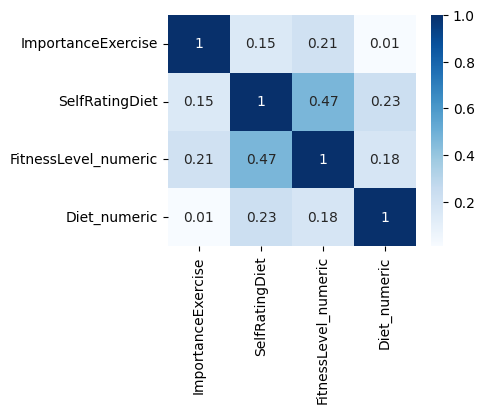

In [9]:
plt.figure(figsize=(4,3))
correlation_matrix = fit_df[features.columns[1:]].corr(method = "kendall").round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

## 1.b. One-hot encoding for heatmaps

Use one hot encoding to create some more numeric data

In [10]:
features = ['index','ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'DoYouDo', 'Daytime']
small_fit = pd.get_dummies(fit_df[features])
small_fit

,index,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo_Alone,DoYouDo_I don't really exercise,DoYouDo_With a friend,DoYouDo_With a group,DoYouDo_Within a class environment,Daytime_Afternoon,Daytime_Early morning,Daytime_Evening
0,0,2,3,2,3,0,1,0,0,0,0,1,0
1,1,4,4,2,4,0,0,0,1,0,0,1,0
2,2,3,3,2,4,1,0,0,0,0,0,1,0
3,3,4,3,3,4,1,0,0,0,0,0,0,1
4,4,3,1,3,4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,3,5,2,4,1,0,0,0,0,0,0,1
541,541,1,2,3,3,0,1,0,0,0,0,1,0
542,542,4,2,2,4,1,0,0,0,0,0,1,0
543,543,3,3,2,3,1,0,0,0,0,0,0,1


Now that we have more fields, look for correlations again

<AxesSubplot: >

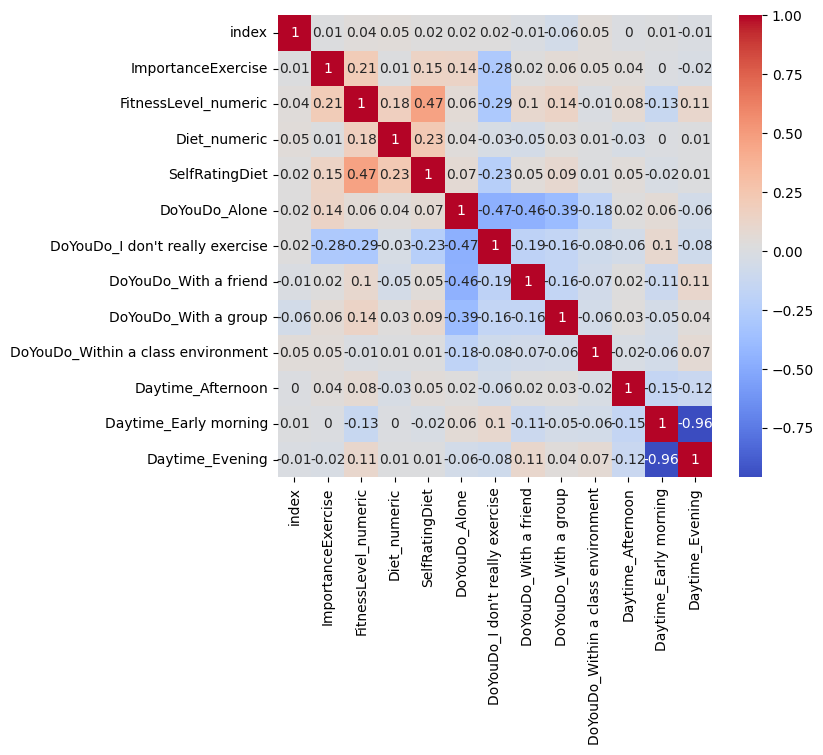

In [11]:
plt.figure(figsize=(7,6))
correlation_matrix = small_fit.corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

This gives us some directions to pursue:
> A correlation between time of day and whether exercise is alone?  
> A group seems to have the highest correlation with a high fitness level?  
> Early morning seems to have a negative correlation with fitness level (?)  
> Correlation between diet and fitness?  

Note: there is some correlation between columns such as: `DoYouDo_Alone` and `DoYouDo_I don't really exercise` because although they can't both be `1` at the same time, they can both be `0` at the same time

# 2. Correlations beween the time of day, fitness and exercising alone

Working on time of day + whether exercise is alone:  
create a `not_alone` column, to try dig in this some more

In [12]:
small_fit["not_alone"] = small_fit["DoYouDo_With a friend"] + small_fit["DoYouDo_With a group"] + small_fit["DoYouDo_Within a class environment"]

---
### <span style="color:blue"> Exercise:</span>
>  perform a sanity check: did we get this right?

---

with our new `not_alone` column

<AxesSubplot: >

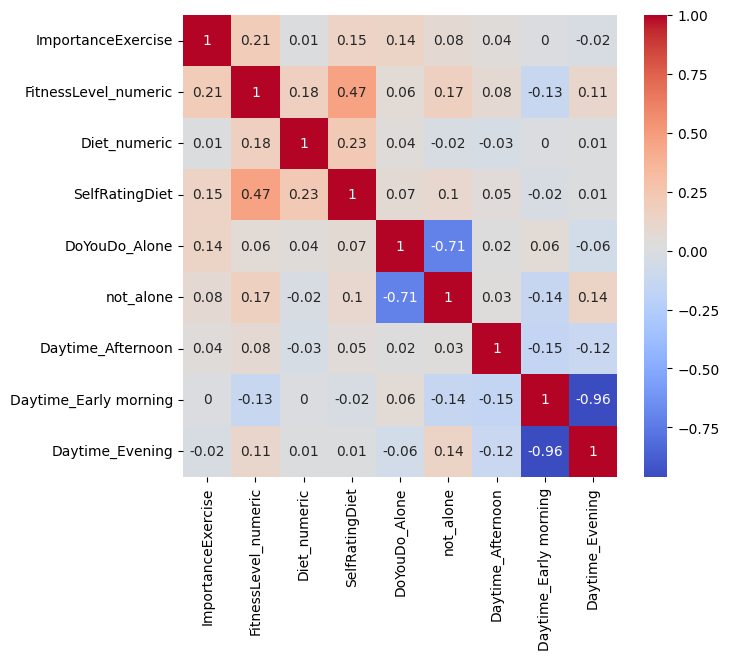

In [14]:
features = ['ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet','DoYouDo_Alone',"not_alone", 'Daytime_Afternoon',
       'Daytime_Early morning', 'Daytime_Evening']
plt.figure(figsize=(7,6))
correlation_matrix = small_fit[features].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

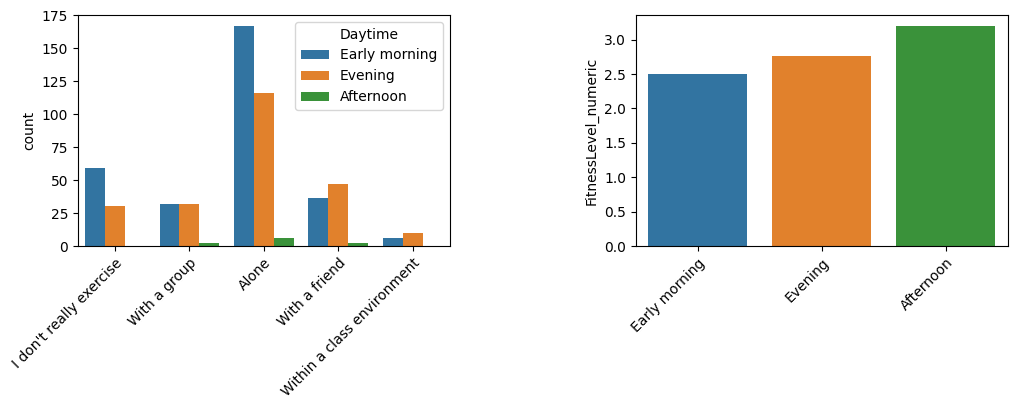

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

sns.countplot(data = fit_df, hue='Daytime',  x = "DoYouDo", ax = ax[0]) 
sns.barplot(data = fit_df , x='Daytime',  y = "FitnessLevel_numeric", errorbar=None, ax = ax[1])  

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

plt.show()


**Note the alignment of the tick marks**  
using horizontal alignment (`ha`). Other values are:  
'left', 'center', and 'justify'

---
### <span style="color:blue"> Exercise:</span>
> Slice the data so that it doesn't contain Afternoon in `Daytime` and doesn't contain I don't really exercise in `exercise`
> 
> Then re-create the figure


---

Is there maybe a connection between diets and the time of the day?

Text(0.5, 0, '')

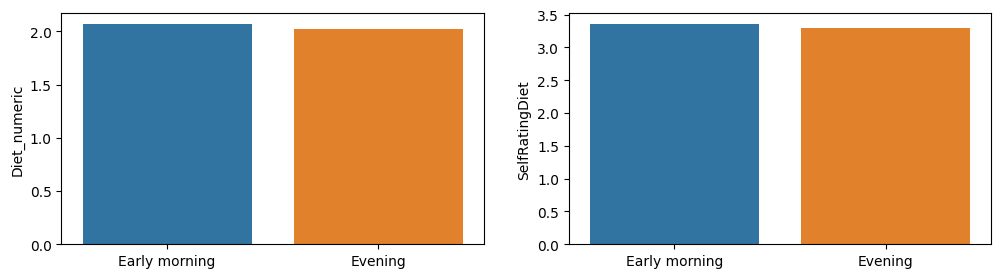

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
sns.barplot(data = fit_df[(fit_df.DoYouDo == "Alone")& (fit_df.Daytime != "Afternoon")] , x='Daytime',  y = "Diet_numeric", errorbar=None, ax = ax[0])  
sns.barplot(data = fit_df[(fit_df.DoYouDo == "Alone")& (fit_df.Daytime != "Afternoon")] , x='Daytime',  y = "SelfRatingDiet", errorbar=None,ax = ax[1])  

ax[0].set_xlabel('')
ax[1].set_xlabel('')

**Input to chatGPT:**  
fix grammar:\
Most people who are exercise alone exercise in the morning\
People who exercise in the morning percieve themselves as unfit  than those in evening\
No connection to diet

---
### <span style="color:green"> Observation 1:</span>

>Most people who exercise alone do so in the morning.
>
>People who exercise in the morning perceive themselves as more unfit compared to those who exercise in the evening.
>
>There is no connection to diet.
---

# 3. Survey `checkbox` data

We saw some connection to group type. We can work with group type, or dig in on exercies.  
To continue, lets:
1. Merge our current data into the original data - merge `small_fit` into `fit_df`
2. Split the exercise data field
3. Melt data into a long format

## 3a. Merge

`small_fit` is the dataframe with the get_dummies that we create in section 1

`small_fit = pd.get_dummies(fit_df[features])`

In [17]:
merged_df = fit_df.merge(small_fit)

**note: give the merged dataframe a new name, or else everytime you merge your dataframe will change**

In [18]:
len(merged_df)

545

In [19]:
merged_df.columns

Index(['index', 'Date', 'Gender', 'Age', 'ImportanceExercise', 'FitnessLevel',
       'Frequency', 'Barriers', 'Activity', 'DoYouDo', 'Daytime', 'Unit',
       'Diet', 'BarriersDiet', 'SelfRatingDiet', 'RecommendedFriend',
       'PurchasedEquipment', 'Motivation', 'FitnessLevel_numeric',
       'Diet_numeric', 'DoYouDo_Alone', 'DoYouDo_I don't really exercise',
       'DoYouDo_With a friend', 'DoYouDo_With a group',
       'DoYouDo_Within a class environment', 'Daytime_Afternoon',
       'Daytime_Early morning', 'Daytime_Evening', 'not_alone'],
      dtype='object')

## 3b. Splitting data fields

Split the exercise column according to ';'

n indicates how many splits to perform

In [20]:
fit_df["Activity"].unique()

array(["I don't really exercise", 'Walking or jogging;Swimming',
       'Walking or jogging', 'Walking or jogging;Gym;Lifting weights',
       'Walking or jogging;Yoga', 'Gym;Team sport', 'Gym',
       'Walking or jogging;Team sport',
       "Walking or jogging;I don't really exercise",
       'Walking or jogging;Gym', 'Team sport', 'Zumba dance', 'Yoga',
       'Walking or jogging;Gym;Lifting weights;Team sport',
       'Walking or jogging;Gym;Yoga;Lifting weights', 'Gym;Swimming',
       'Gym;Lifting weights;Team sport',
       'Walking or jogging;Swimming;Lifting weights',
       'Walking or jogging;Gym;Yoga',
       'Walking or jogging;Zumba dance;Team sport',
       'Walking or jogging;Zumba dance', 'Gym;Swimming;Lifting weights',
       "Team sport;I don't really exercise",
       'Walking or jogging;Lifting weights',
       'Walking or jogging;Yoga;Team sport', 'Swimming',
       'Gym;Lifting weights', 'Walking or jogging;Gym;Swimming',
       'Walking or jogging;Gym;Team sport'

In [21]:
max_semicomma = fit_df.Activity.str.count(';').max()
max_semicomma

6

In [22]:
list_exs = fit_df["Activity"].str.split(";", n = max_semicomma, expand = True)
list_exs

,0,1,2,3,4,5,6
0,I don't really exercise,None,None,None,None,None,None
1,Walking or jogging,Swimming,None,None,None,None,None
2,Walking or jogging,None,None,None,None,None,None
3,Walking or jogging,Gym,Lifting weights,None,None,None,None
4,I don't really exercise,None,None,None,None,None,None
...,...,...,...,...,...,...,...
540,Walking or jogging,None,None,None,None,None,None
541,Walking or jogging,Gym,Swimming,None,None,None,None
542,Walking or jogging,Yoga,None,None,None,None,None
543,Walking or jogging,None,None,None,None,None,None


Add these new columns with the exercises to the dataframe

In [23]:
merged_df["choice1"]= list_exs[0]
merged_df["choice2"]= list_exs[1]
merged_df["choice3"]= list_exs[2]
merged_df["choice4"]= list_exs[3]

In [52]:
merged_df[["Activity", "choice1", "choice2", "choice3","choice4"]].head(3)

,Activity,choice1,choice2,choice3,choice4
0,I don't really exercise,I don't really exercise,None,None,None
1,Walking or jogging;Swimming,Walking or jogging,Swimming,None,None
2,Walking or jogging,Walking or jogging,None,None,None


## 3c. Melting into long format

We now want to view some stats on the diffent exercise. But the data is in wide format.

Wide format: each row has one `key`: one person, one occurance

Long format: each row has more than one `key`: one person per date, one occurance per person, one person per date per site

Lets unite exercise1, exercise2 and exercise 3 into one column. 

We use 'melt'. 



This is in wide format:

In [25]:
features = ['index','ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'choice1','choice2', 'choice3', 'choice4', 'DoYouDo_Alone',"not_alone", 'Daytime']

In [26]:
merged_df[features].head(2)

,index,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,choice1,choice2,choice3,choice4,DoYouDo_Alone,not_alone,Daytime
0,0,2,3,2,3,I don't really exercise,None,None,None,0,0,Early morning
1,1,4,4,2,4,Walking or jogging,Swimming,None,None,0,1,Early morning


This is in long format:

In [27]:
ids = ['index','ImportanceExercise', 'FitnessLevel','FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', "DoYouDo",'DoYouDo_Alone',"not_alone", 'Daytime']
values = ['choice1','choice2', 'choice3', 'choice4']

In [28]:
melted_df = pd.melt(merged_df, id_vars= ids, value_vars= values)
melted_df.head()

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo,DoYouDo_Alone,not_alone,Daytime,variable,value
0,0,2,Good,3,2,3,I don't really exercise,0,0,Early morning,choice1,I don't really exercise
1,1,4,Very good,4,2,4,With a group,0,1,Early morning,choice1,Walking or jogging
2,2,3,Good,3,2,4,Alone,1,0,Early morning,choice1,Walking or jogging
3,3,4,Good,3,3,4,Alone,1,0,Evening,choice1,Walking or jogging
4,4,3,Unfit,1,3,4,I don't really exercise,0,0,Evening,choice1,I don't really exercise


Rename columns:

In [29]:
melted_df = melted_df.rename(columns={'variable':'choice','value':'exercise'})
melted_df.columns

Index(['index', 'ImportanceExercise', 'FitnessLevel', 'FitnessLevel_numeric',
       'Diet_numeric', 'SelfRatingDiet', 'DoYouDo', 'DoYouDo_Alone',
       'not_alone', 'Daytime', 'choice', 'exercise'],
      dtype='object')

Each id appears a few times (how many times?)

In [30]:
melted_df.loc[melted_df['index']== 5]

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo,DoYouDo_Alone,not_alone,Daytime,choice,exercise
5,5,5,Average,2,2,3,With a group,0,1,Evening,choice1,Walking or jogging
550,5,5,Average,2,2,3,With a group,0,1,Evening,choice2,Yoga
1095,5,5,Average,2,2,3,With a group,0,1,Evening,choice3,None
1640,5,5,Average,2,2,3,With a group,0,1,Evening,choice4,None


# 4. Exercise type, fitness level and diet

Section 3 was technical  
finally.. we can look at the categories

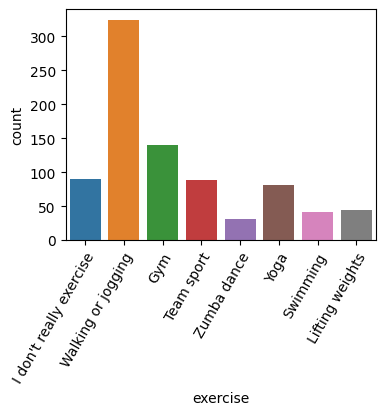

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(data = melted_df, x = 'exercise')
plt.xticks(rotation=60, ha='right', rotation_mode='anchor')
plt.show()

Now lets look at the fitness level:

In [32]:
group_df = melted_df.groupby('exercise')[['FitnessLevel_numeric']].mean()
group_df

,FitnessLevel_numeric
exercise,
Gym,2.864286
I don't really exercise,2.033333
Lifting weights,3.111111
Swimming,2.926829
Team sport,3.056180
Walking or jogging,2.709877
Yoga,2.728395
Zumba dance,2.645161


plot the average fitness level of each exercise.  
It is better to first order them

In [33]:
order_y=melted_df.groupby('exercise')['FitnessLevel_numeric'].mean().sort_values().index
order_y

Index(['I don't really exercise', 'Zumba dance', 'Walking or jogging', 'Yoga',
       'Gym', 'Swimming', 'Team sport', 'Lifting weights'],
      dtype='object', name='exercise')

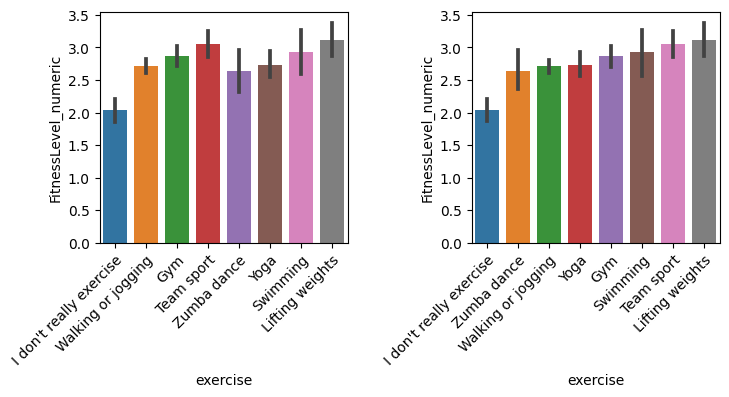

In [34]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
plt.subplots_adjust(wspace = 0.5)
sns.barplot(data = melted_df, x='exercise', y='FitnessLevel_numeric', ax = ax[0])
sns.barplot(data = melted_df, x='exercise', y='FitnessLevel_numeric', order = order_y, ax = ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

order the indexes for the next set of figures:

In [35]:
order_count = melted_df['exercise'].value_counts().index

In [36]:
order_y=melted_df.groupby('exercise')['FitnessLevel_numeric'].mean().sort_values().index

In [37]:
order_diet=melted_df.groupby('exercise')['Diet_numeric'].mean().sort_values().index

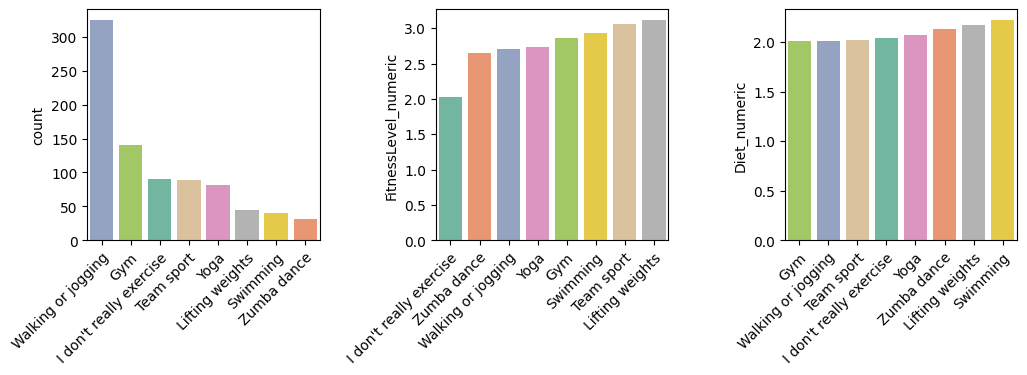

In [38]:
cmap = plt.get_cmap('Set2')
colors = cmap(np.linspace(0, 1, len(order_y)))

color_map = dict(zip(order_y, colors))

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

sns.countplot(data=melted_df, x='exercise', ax=ax[0], order=order_count, palette=color_map)
sns.barplot(data=melted_df, x='exercise', y='FitnessLevel_numeric', ax=ax[1], errorbar=None, palette=color_map, order=order_y)
sns.barplot(data=melted_df, x='exercise', y='Diet_numeric', ax=ax[2], errorbar=None, palette=color_map, order=order_diet)

# Correctly set x-tick labels for each subplot based on their own order
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')  # Adjusted to use ax[1]'s labels


#plt.set_tick_params(rotation=45, ha='right', rotation_mode='anchor')

plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

plt.show()

**Prompt ChatGPT**  
fix grammar:  
People who do a less popular exercise seem to declare themselves as more fit\
They are also more on a diet.\
Zumba dancers don't feel fit and are more on a diet.\


---
### <span style="color:green"> Observation 2:</span>

>
>People who engage in less popular exercises tend to consider themselves as being more fit. They are also more likely to follow a diet. 
>
>Zumba dancers don't feel fit and tend to follow a diet more strictly.



---

---
# <span style="color:blue"> BIG Exercise:</span>
> Display in a plot the barriers people list. This data is found in the `Barriers` column

> In order to do that, let's break this task into steps:


#### <span style="color:blue"> Exercise - task1:</span>
> Split the data from the `Barriers` column  
> Insert the data you split into 4 new columns in `merged_df`: `barrier1`, `barrier2`, `barrier3`, `barrier4`
> 


In [88]:
#YOUR CODE HERE


#SOME MORE OF YOUR CODE HERE
# merged_df["barrier1"] = 
# merged_df["barrier2"] =  
# merged_df["barrier3"] =  
# merged_df["barrier4"] = 
 

---
#### <span style="color:blue">Exercise - task2:¶</span>


> Split the data from the `Barriers` column  
> Melt: `barrier1`, `barrier2`, `barrier3` into long format, using the column `index` as the id variable
> Name the new dataframe `barrier_melted_df`  

In [64]:
ids = ['index']
values = ["barrier1","barrier2","barrier3"]

#YOUR CODE HERE


#barrier_melted_df = barrier_melted_df.rename(columns={'variable':'choice','value':'barrier'})

---
#### <span style="color:blue">Exercise - task3:¶</span>


> Plot. Think which plot fits here  
> Use `barrier_melted_df` and `barrier`  
> ADVANCED: show ONLY the top-6 barriers

In [83]:
#ANSWER TO ADVANCED:

barrier_display_df = \
barrier_melted_df.groupby("barrier")[["barrier"]].count()\
                                                 .rename(columns={'barrier':'count_barrier'})\
                                                 .reset_index()\
                                                 .sort_values(by = "count_barrier", ascending = False).head(6)
barrier_display_df

,barrier,count_barrier
5,I don't have enough time,290
4,I can't stay motivated,178
9,I'll become too tired,112
7,I exercise regularly with no barriers,66
6,I don't really enjoy exercising,55
8,I have an injury,30


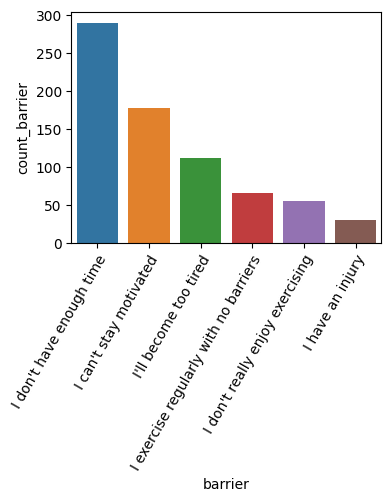

In [87]:
plt.figure(figsize=(4,3))
sns.barplot(data = barrier_display_df, x = "barrier", y = 'count_barrier')
plt.xticks(rotation=60, ha='right', rotation_mode='anchor')
plt.show()

---

# 5. More fit more diet?

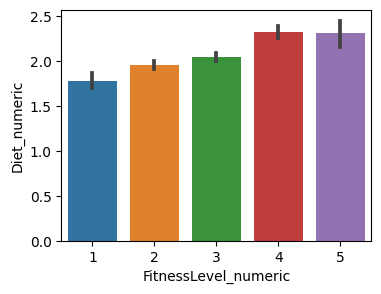

In [39]:
plt.figure(figsize=(4,3))
sns.barplot(data=melted_df, x='FitnessLevel_numeric', y='Diet_numeric')
plt.show()

We can see a certain connection between fitness and diet.

The correlation we found is not high (0.21). Let's try to break it down by exercises.
Order the exercises by the diet level of the most fit  
Color the two that stand out in a different color

In [40]:
melted_df[melted_df.FitnessLevel_numeric ==5].groupby('exercise')['Diet_numeric'].mean().sort_values()

exercise
Gym                        2.000000
Team sport                 2.142857
Walking or jogging         2.294118
Yoga                       2.500000
Swimming                   2.600000
Lifting weights            2.666667
I don't really exercise    3.000000
Zumba dance                3.000000
Name: Diet_numeric, dtype: float64

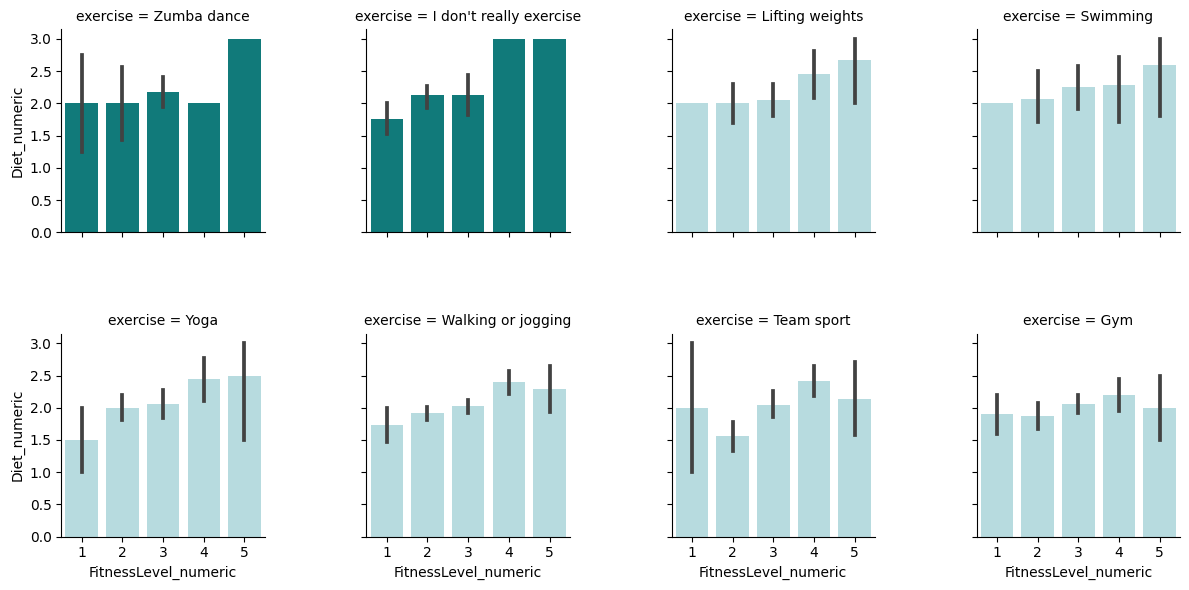

In [41]:
custom_order = ["Zumba dance","I don't really exercise", "Lifting weights", 'Swimming', 'Yoga',
                'Walking or jogging',  'Team sport','Gym' ]
custom_palette = {exercise: 'darkcyan' if exercise in ["Zumba dance", "I don't really exercise"] else 'powderblue' for exercise in custom_order}

g = sns.FacetGrid(data=melted_df, col="exercise", hue="exercise", col_wrap=4, col_order=custom_order, palette=custom_palette)
g.map_dataframe(sns.barplot, x='FitnessLevel_numeric', y="Diet_numeric")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

---
### <span style="color:green"> Observation 3:</span>

>
>We observe that fit individuals, particularly those who engage in Zumba dancing or do not exercise
> are more likely to adhere to a diet.


---

# 7. Combine groupby and plots

Two examples where groupby and then plot help to observe trends

### First example

In [42]:
melted_df = melted_df[melted_df.DoYouDo != "I don\'t really exercise"]

In [43]:
melted_df['DoYouDo'] = melted_df['DoYouDo'].replace(
    {'With a group': 'With a group', 'Within a class environment': 'With a group'})

C:\Users\lihin\AppData\Local\Temp\ipykernel_24136\4247718642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_df['DoYouDo'] = melted_df['DoYouDo'].replace(


In [44]:
melted_df.groupby(["exercise", "DoYouDo"])[["FitnessLevel_numeric", "SelfRatingDiet"]].agg(['mean', 'count'])

FitnessLevel_numeric        \
                                                      mean count   
exercise                DoYouDo                                    
Gym                     Alone                     2.819277    83   
                        With a friend             2.973684    38   
                        With a group              3.000000    17   
I don't really exercise Alone                     2.416667    12   
                        With a friend             2.333333     3   
                        With a group              2.500000     2   
Lifting weights         Alone                     3.160000    25   
                        With a friend             2.800000    10   
                        With a group              3.300000    10   
Swimming                Alone                     2.611111    18   
                        With a friend             3.076923    13   
                        With a group              3.625000     8   
Team sport              Alone                     3.250000    28   
                        With a friend             3.055556    18   
                        With a group              3.076923    39   
Walking or jogging      Alone                     2.748815   211   
                        With a friend             2.714286    49   
                        With a group              2.863636    44   
Yoga                    Alone                     2.761905    63   
                        With a friend             2.571429     7   
                        With a group              2.800000    10   
Zumba dance             Alone                     2.181818    11   
                        With a friend             3.200000     5   
                        With a group              2.923077    13   

                                      SelfRatingDiet        
                                                mean count  
exercise                DoYouDo                             
Gym                     Alone               3.409639    83  
                        With a friend       3.315789    38  
                        With a group        3.117647    17  
I don't really exercise Alone               3.000000    12  
                        With a friend       3.666667     3  
                        With a group        3.000000     2  
Lifting weights         Alone               3.680000    25  
                        With a friend       3.300000    10  
                        With a group        3.400000    10  
Swimming                Alone               3.500000    18  
                        With a friend       3.692308    13  
                        With a group        3.750000     8  
Team sport              Alone               3.714286    28  
                        With a friend       3.555556    18  
                        With a group        3.487179    39  
Walking or jogging      Alone               3.398104   211  
                        With a friend       3.306122    49  
                        With a group        3.522727    44  
Yoga                    Alone               3.428571    63  
                        With a friend       3.714286     7  
                        With a group        3.400000    10  
Zumba dance             Alone               3.181818    11  
                        With a friend       3.200000     5  
                        With a group        3.461538    13

In [45]:
sliced = melted_df[(melted_df.exercise == "Zumba dance") | (melted_df.exercise == "Gym") | (melted_df.exercise == "Walking or jogging") ]

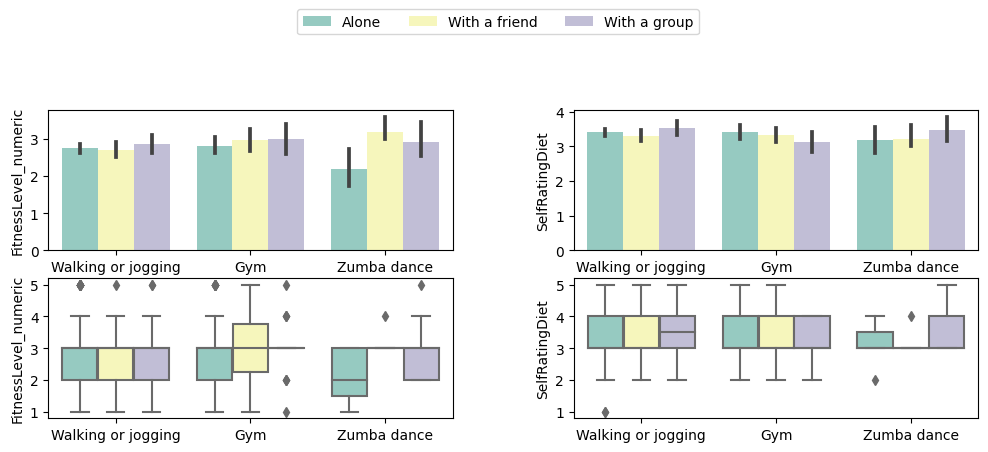

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))

hue_order = ['Alone', 'With a friend', 'With a group']

sns.barplot(sliced, x = "exercise", y = "FitnessLevel_numeric", hue = "DoYouDo", ax=ax[0,0], hue_order=hue_order, palette="Set3")
sns.barplot(sliced, x = "exercise", y = "SelfRatingDiet", hue = "DoYouDo", ax=ax[0,1], hue_order=hue_order, palette="Set3")
sns.boxplot(sliced, x = "exercise", y = "FitnessLevel_numeric", hue = "DoYouDo", ax=ax[1,0], hue_order=hue_order, palette="Set3")
sns.boxplot(sliced, x = "exercise", y = "SelfRatingDiet", hue = "DoYouDo", ax=ax[1,1], hue_order=hue_order, palette="Set3")
 
#ax[0,0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
#ax[0,1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.3)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

ax[0,0].legend_.remove()
ax[0,1].legend_.remove()
ax[1,0].legend_.remove()
ax[1,1].legend_.remove()

# Create a single legend for all plots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()



boxplot not a good idea here, median does not show enough of the difference

---
### <span style="color:green"> Observation 4:</span>

>
> People who walk or go to gym with a group perceive themselves as more fit (but that doesn't happen with Zumba).\
> People who walk or do Zumba with a group tend more to stick to a diet (but that doesn't happen with gym).  
> This trend was not detected in other sports

---

### Second example

In [47]:
melted_df.columns

Index(['index', 'ImportanceExercise', 'FitnessLevel', 'FitnessLevel_numeric',
       'Diet_numeric', 'SelfRatingDiet', 'DoYouDo', 'DoYouDo_Alone',
       'not_alone', 'Daytime', 'choice', 'exercise'],
      dtype='object')

In [48]:
res = melted_df.groupby("index").agg({"exercise": "count", "ImportanceExercise": "mean", "Diet_numeric":"mean", "FitnessLevel_numeric" : "mean"})
res

,exercise,ImportanceExercise,Diet_numeric,FitnessLevel_numeric
index,,,,
1,2,4.0,2.0,4.0
2,1,3.0,2.0,3.0
3,3,4.0,3.0,3.0
5,2,5.0,2.0,2.0
6,1,3.0,1.0,3.0
...,...,...,...,...
538,1,3.0,2.0,5.0
539,1,3.0,2.0,5.0
540,1,3.0,2.0,5.0


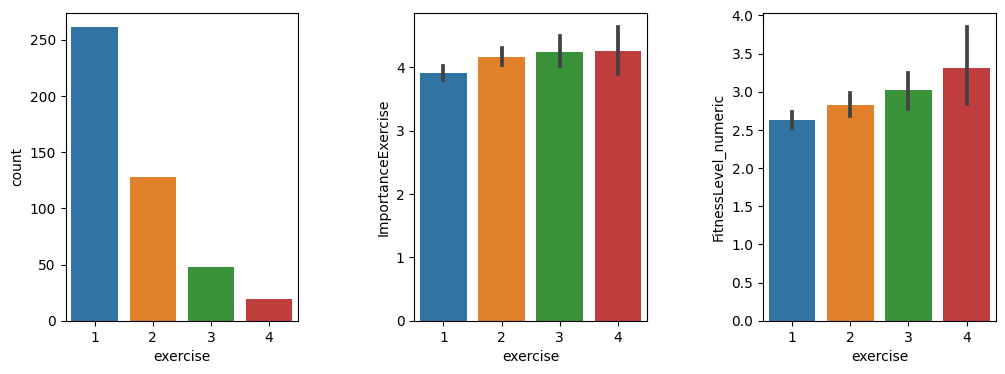

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(res,  x = "exercise", ax = ax[0])
sns.barplot(res, x = "exercise", y = "ImportanceExercise", ax = ax[1])
sns.barplot(res, x = "exercise", y = "FitnessLevel_numeric", ax = ax[2])
plt.subplots_adjust(wspace=0.5)

---
### <span style="color:green"> Observation 5:</span>

>
> Most people do only one sport.\
> The more sports people do the more they think exercise is important\
> The more sports people do the more they think they are fit

---